https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import svm
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.tsv', sep='\t')
#len(train)
#len(train.drop_duplicates(subset='Phrase'))

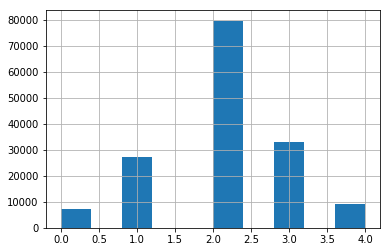

In [3]:
train['Sentiment'].hist()

# the distribution is rather unbalanced
# reduce neutrality
# t = train.drop(train.query('Sentiment == 2').sample(frac=.4).index)
#len(t[t['Sentiment'] == 0])
# train = train[ train['Sentiment'] != 2.0] 
#t['Sentiment'].hist()

In [4]:
# simple preprocess - no normalization done - no good performance
#v = TfidfVectorizer(min_df=0.0)
#x = v.fit_transform(train['Phrase'])

# v_bigram.get_feature_names()
# len(v.get_feature_names())


In [5]:
# simple bigramm preprocessing - no good perfomrance
# v_bigram = TfidfVectorizer(min_df=0.0, ngram_range=(1,2))
# x_bigram = v_bigram.fit_transform(train['Phrase'])
# y = train['Sentiment']


In [8]:
# more sofisticated preprocessing
#import nltk
#nltk.download()
from nltk import word_tokenize          
from nltk import pos_tag
from nltk.stem import SnowballStemmer


class Preprocessor(object):
    '''
        Tagging and lemmatization also possible, but only stemming improves 
        performance.
    '''
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        
        #tagged = pos_tag(word_tokenize(doc))
        #return[ self.stemmer.stem(word) + '_' + tag   for word,tag in tagged]
        return [ self.stemmer.stem(word) for word in word_tokenize(doc)]



In [5]:
# count vectorizer works better

#v_full_pp = TfidfVectorizer(min_df=0.0, tokenizer=Preprocessor())
#x_full_pp = v_full_pp.fit_transform(train['Phrase'])
#y_full_pp = train['Sentiment']

In [29]:
# try with count vectorizer

# v_full_pp_count = CountVectorizer( tokenizer=Preprocessor())
v_full_pp_count = CountVectorizer()
x_full_pp_count = v_full_pp_count.fit_transform(train['Phrase'])
y_full_pp_count = train['Sentiment']

In [36]:
# try with count vectorizer

v_full_pp_count = CountVectorizer( tokenizer=Preprocessor())
x_full_pp_count = v_full_pp_count.fit_transform(train['Phrase'])
y_full_pp_count = train['Sentiment']

In [39]:
# try with count vectorizer

v_full_pp_bi_count = CountVectorizer( tokenizer=Preprocessor(), ngram_range=(1,2))
x_full_pp_bi_count = v_full_pp_bi_count.fit_transform(train['Phrase'])
y_full_pp_bi_count = train['Sentiment']

In [17]:
# Try scaling - also decreases the performance
# scaler = StandardScaler(with_mean=False)
# scaler.fit(x_full_pp_count)
# x_full_pp_count_scaled = scaler.transform(x_full_pp_count)

In [22]:
# try PCA now - does not improve resutls

svd = TruncatedSVD(n_components=1000)
svd.fit(x_full_pp_count)
x_full_pp_count_svd = svd.transform(x_full_pp_count)

In [40]:

# try out different classifieres with accuracy
# clf = LogisticRegression(C=1, penalty='l1', tol=0.01)
#clf = MultinomialNB(alpha=100) # often better on short reviews
#clf = MLPClassifier(solver='adam', alpha=1.0, hidden_layer_sizes=(5, 2), random_state=1)
#clf = OneVsOneClassifier(SGDClassifier(), n_jobs=2)
#clf = svm.SVC(kernel='linear', C=1)
#clf = OneVsOneClassifier(LinearSVC())
#clf = KNeighborsClassifier()
clf = OneVsOneClassifier(LogisticRegression(C=1, penalty='l1', tol=0.01))
#clf = OneVsRestClassifier(LogisticRegression(C=1, penalty='l1', tol=0.01))

#scores = cross_val_score(clf, x_full_pp_count, y_full_pp_count, cv=8, n_jobs=8, pre_dispatch=8)
scores = cross_val_score(clf, x_full_pp_bi_count, y_full_pp_bi_count, cv=8, n_jobs=8, pre_dispatch=8)
#scores = cross_val_score(clf, x_full_pp_count_svd, y_full_pp_count, cv=2, n_jobs=8, pre_dispatch=8)
#scores = cross_val_score(clf, x_full_pp_count_scaled, y_full_pp_count, cv=2, n_jobs=8, pre_dispatch=8)
#scores = cross_val_score(clf, x_full_pp, y_full_pp, cv=2, n_jobs=8, pre_dispatch=8)
#scores = cross_val_score(clf, train[['pos','neg','neu']], y, cv=2, n_jobs=8, pre_dispatch=8)

np.mean(scores)

0.59338076599964662

In [ ]:
#param_grid = {
#                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
#                #'penalty': ['l1','l2'], 
#                'tol':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
#                #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#        }
#clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid,  n_jobs=8, pre_dispatch=8, cv=5, error_score=0)
#clf.fit(x, y)
#clf.best_params_

In [ ]:
# bigram classifiers
#clf = MultinomialNB() # often better on short reviews
#clf = LogisticRegression(C=10,penalty='l2',tol=0.001)
#scores = cross_val_score(clf, x_bigram, y, cv=2, n_jobs=8, pre_dispatch=8)
#np.mean(scores)


Results

|                 classifier          | min_df = .0, unigram | min_df = .0, Bigram (1,2) |
|:------------------------------------|----------------------|---------------------------|
|      MultinomialNB()                | .5534730072737879    | .5406061068236645         |
|LogReg(C=1, penalty='l1',tol=0.01)   | .58260284605859414   | .                         |
|LogReg(C=10,penalty='l2',tol=0.001)  | .57725870526032308   | .                         |
|LogReg(C=10,penalty='l2',tol=0.025)  | .                    | .                         |
|MLP s='adam', a=1.0, h=(5, 2), r=1)  | .55729206174317525   | .                         |




|                 classifier        |min_df=.0,uni    |min_df=.0,Bi(1,2)    |min_df=.0,uni,stem|count,uni,stem|
|:----------------------------------|-----------------|---------------------|------------------|--------------|
|MultinomialNB()                    |.5534730072737879|.5406061068236645    |.5534986297366149 |              |
|LogReg(C=1, penalty='l1',tol=0.01) |.5826028460585941|.                    |.58902984463991692|              |
|LogReg(C=10,penalty='l2',tol=0.001)|.5772587052603231|.                    |.                 |              |
|LogReg(C=10,penalty='l2',tol=0.025)|.                |.                    |.                 |              |
|MLP s='adam', a=1.0, h=(5, 2), r=1)|.5572920617431753|.                    |.56069458765045388|              |
|OneVSOne linearSVC                 |.                |.                    |.59318847274344577|              |
|OneVSOne LogReg                    |.                |.                    |.5955209423268546 |.5968473536849|




In [42]:
# check for doubles in train and test corpus and correct sentiment of test data 
merge = pd.merge(train, test, how='left', left_on='Phrase', right_on='Phrase')
duplicates = merge[merge.Sentiment_y.notnull() ][['Phrase', 'Sentiment_x']]

In [ ]:
# generation of Sentiment for the test material (uni, stemmed, etc)
test = pd.read_csv('test.tsv', sep='\t')
x_test_full_pp_count = v_full_pp_count.transform(test['Phrase'])
clf.fit(x_full_pp_count, y_full_pp_count)
test['Sentiment'] = clf.predict(x_test_full_pp_count)  
test[['PhraseId','Sentiment']].to_csv( path_or_buf='sentiment_submission_v2.csv', index=False)

# count vector + stemming + OneVsOne Classifier brings aus 62% Acc

# add sentiment from duplicates to the test data

test_extended = pd.merge(test, duplicates, how='left', left_on='Phrase', right_on='Phrase')
test_extended['Sentiment_final'] = test_extended.apply(lambda row: row['Sentiment'] if pd.isnull(row['Sentiment_x']) else row['Sentiment_x'], axis=1)
test_extended['Sentiment'] = test_extended['Sentiment_final'].astype('int')
#test_extended[['PhraseId','Sentiment']].to_csv( path_or_buf='sentiment_submission_v3.csv', index=False)

# --> 0.65891  Acc

In [43]:
# generation of Sentiment for the test material and duplication adding (bi, stemmed)
test = pd.read_csv('test.tsv', sep='\t')
x_test_full_pp_bi_count = v_full_pp_bi_count.transform(test['Phrase'])
clf.fit(x_full_pp_bi_count, y_full_pp_bi_count)
test['Sentiment'] = clf.predict(x_test_full_pp_bi_count)

test_extended = pd.merge(test, duplicates, how='left', left_on='Phrase', right_on='Phrase')
test_extended['Sentiment_final'] = test_extended.apply(lambda row: row['Sentiment'] if pd.isnull(row['Sentiment_x']) else row['Sentiment_x'], axis=1)
test_extended['Sentiment'] = test_extended['Sentiment_final'].astype('int')
test_extended[['PhraseId','Sentiment']].to_csv( path_or_buf='sentiment_submission_v4.csv', index=False)

# ---> 0.6628 Acc